# Kuvantunnistus omista kuvista
Tunnistetaan kuvia aterimista

In [32]:
# Importit
from keras.utils import to_categorical, image_dataset_from_directory
import pandas as pd
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input, Rescaling, GlobalAveragePooling2D
from keras import models


Tuodaan ja valmistellaan kuvat
- Luokitellaan kuvat
- Laitetaan kuvat datasettiin

In [33]:
# Tuodaan kuvat
train_dataset = image_dataset_from_directory(
    directory="Skaalatut Kuvat",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Reserve 20% of data for validation
    subset="training",  # Load the training subset
)

val_dataset = image_dataset_from_directory(
    directory="Skaalatut Kuvat",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Reserve 20% of data for validation
    subset="validation",  # Load the validation subset
)

normalization_layer = Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 32 files belonging to 2 classes.
Using 26 files for training.
Found 32 files belonging to 2 classes.
Using 6 files for validation.


Mallin koulutus ja testaus

In [37]:
model = models.Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer
])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Koulutetaan malli
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=32,
    verbose=0,
    callbacks=[early_stopping]
)

print("Koulutus valmis!")
print("Accuracy: ", history.history['accuracy'][-1])
print("Validation Accuracy: ", history.history['val_accuracy'][-1])
print("Loss: ", history.history['loss'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,826 (120.20 MB)

 Trainable params: 31,509,826 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

Koulutus valmis!
Accuracy:  0.5
Validation Accuracy:  0.3333333432674408
Loss:  2.281421422958374
Validation Loss:  4.479602813720703


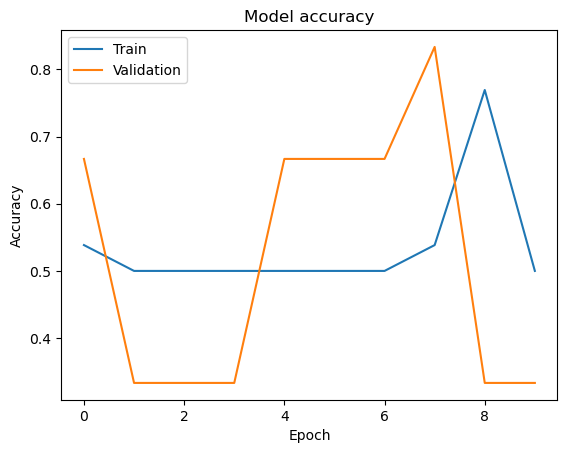

In [38]:
# Näytetään mallin treenihistoria
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()